## Exercese 1 - Procedural vs Functional Programming

  Write a program (function!) that takes a list of mixed integers and strings. The function returns the Count of the integer’s items and the word count of the strings items.
Write two different functions to do this - one using a loop (procedural) and constructing a list, and another using comprehension (functional).  
  Test your code using randomly generated lists (random numbers and random words with random order)  
  Use **TimeIt** standard library and **matplotlib** to present the performance difference among the 2 solutions for different list sizes.  
  
  First, we define a count function using forloop to count the number is integers, and a recurse function using lambda to return the number of intergers and strings.


In [2]:
import timeit
import matplotlib.pyplot as plt
import random
import numpy as np
import string

#Exercise 1


#Procedural Methood
def count(L):
    n_count = 0
    w_count = 0
    for i in L:
        if isinstance(i, int):
            n_count +=1
        elif isinstance(i, str):
            w_count +=1
    return n_count, w_count


def recurse(L):

    return sum(map(lambda x: isinstance(x,int),L)), sum(map(lambda x: isinstance(x,str),L))


In order to create random list given the lenght of the list, define funcitons to generate randome words and random numbers. Then for each element in the list, randelement() randomly picks between 0 and 1 which represent int and string repectively. 

In [3]:

def randword():
	s="".join(random.choice(string.ascii_letters) for _ in range(random.randint(1,10)))
	return s

def randelement():
	if random.randint(0,1)==0:
		return random.uniform(-10,100)
	else:
		return randword()

def randlist(i):
	l = [randelement() for _ in range(i)]
	return l

The test function return the two lists of timeit results.

In [4]:
def wrapper(func, args):
    def wrapped():
        return func(args)
    return wrapped


def test(maxi, inc):
    time1_L = []
    time2_L = []
    for i in range(0, maxi, inc):
        L = randlist(i)
        wrap1 = wrapper(count,L)
        wrap2 = wrapper(recurse,L)
        time1 =timeit.timeit(wrap1, number = 1000)
        time2 = timeit.timeit(wrap2, number = 1000)
        time1_L.append(time1)
        time2_L.append(time2)
        
    return time1_L,time2_L


Pick the max of the length of the list, and the increment. Plotting two functions' runtime vs list size.

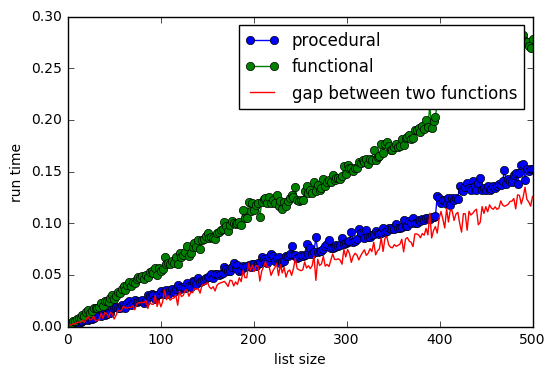

In [5]:
maxi = 500
inc = 2

x = np.linspace(0, maxi,maxi//inc)


result1,result2 = test(maxi,inc)

result1 = np.array(result1)
result2 = np.array(result2)
gap= result2-result1


plt.plot(x,result1, label = 'procedural',linestyle='-', marker='o')
plt.plot(x,result2, label = 'functional',linestyle='-', marker='o')
plt.plot(x,gap,label = 'gap between two functions')
plt.xlabel('list size')
plt.ylabel('run time')
plt.legend()
plt.show()


As a result the procedural method runs faster than the functional method in this problem.

## Exercise 2 – Simple Grading System - memory based

With this fun system, you can do the following:
  add student
  add grades
  add grade
  print list
  print summary
  plot
>>>add student 1 AA

add student successful
type "exit" to exit

>>>add grades 1 10,10,10,10,2,20,20,10

incorrect number of arguments ...
usage: add grades {id} {hw1} {hw2} {hw3} {hw4} {hw5} {hw6} {proj1} {proj2}
ex: add grades 1234567 100 95 80 100 97.5 100 60 100
type "exit" to exit

>>>add grades 1 10 10 10 10 2 20 20 10

add grades successful
type "exit" to exit

>>>add student 2 BB

add student successful
type "exit" to exit

>>>add grades 2 20 30 20 50 10 50 30 50 

add grades successful
type "exit" to exit

>>>add student 3 CC

add student successful
type "exit" to exit

>>>dd grades 3 30 30 20 50 10 50 30 50 

invalid command...
with this fun system, you can do the following:
  add student
  add grades
  print list
  print summary
  plot
>>>add grades 3 30 30 20 50 10 50 30 50

add grades successful
type "exit" to exit

>>>add student 4 AC

add student suc

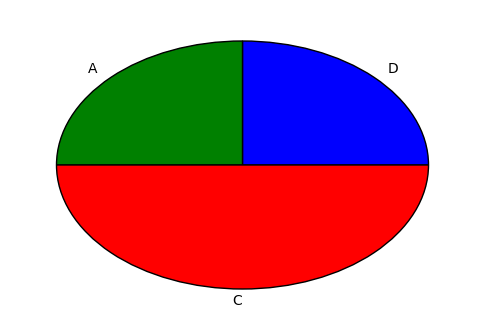

type "exit" to exit

>>>exit

Have a nice day :)


In [6]:
import statistics as stat
from collections import Counter
import matplotlib.pyplot as pyplot

grade_list = ['hw1','hw2','hw3','hw4','hw5','hw6','proj1','proj2']
class_dict = {}

def print_usage(cmd):
    if cmd == 'add student':
        print('usage: add student {id} {name}')

        print('ex: add student 1234567 Adam Smith')
    if cmd == 'add grades':
        print('usage: add grades {id} {hw1} {hw2} {hw3} {hw4} {hw5} {hw6} {proj1} {proj2}')
        print('ex: add grades 1234567 100 95 80 100 97.5 100 60 100')
    if cmd == 'add grade':
        print('usage: add grade {id} {grade type} {grade}')
        print('ex: add grade 1234567 hw1 100')
        print(' or add grade 1234567 proj1 80.5')
    if cmd == 'print list':
        print('usage: print list')
    if cmd == 'print summary':
        print('usage: print summary')

#  0 : empty input
# -1 : invalid command
#  1 : valid command
def check_resp(resp):
    if len(resp)==0:
        return 0
    resp[0] = resp[0].lower()
    if resp[0] not in ['add','print','plot','exit']:
        return -1
    return 1

def add_student(resp_args):
    if len(resp_args) < 2:
        return -1
    if resp_args[0].isdigit():
         if resp_args[1].isdigit():
               return -1
         else:
             newid = int(resp_args.pop(0))
    else:
        return -1
    if newid in class_dict:
        return -2
    grades = {}
    for g in grade_list:
        grades[g] = 0
    class_dict[newid] = {'id': newid, 'name': ' '.join([n.upper() for n in resp_args]),'grades':grades}
    return 0

def add_grades(resp_args):
    if len(resp_args) != 1+len(grade_list):
        return -1
    if not resp_args[0].isdigit():
        return -2
    gradeid = int(resp_args.pop(0))
    if gradeid not in class_dict:
        return -3
    try:
        grades = [float(g) for g in resp_args]
    except ValueError:
        return -4
    if max(grades) > 100 or min(grades) < 0:
        return -4
    for i in range(len(grade_list)):
        class_dict[gradeid]['grades'][grade_list[i]]=grades[i]
    get_grades(gradeid)
    return 0
    

def add_grade(resp_args):
    if len(resp_args) != 3:
        return -1
    if not resp_args[0].isdigit():
        return -2
    gradeid = int(resp_args.pop(0))
    if gradeid not in class_dict:
        return -3
    if resp_args[0] not in grade_list:
        return -4
    try:
        grade = float(resp_args[1])
    except ValueError:
        return -5    
    if grade > 100 or grade < 0:
        return -5
    class_dict[gradeid]['grades'][resp_args[0]] = g
    get_grades(gradeid)
    return 0
 
def add(resp):
    if len(resp) == 0:
        print('what to add?')
        print_usage('add student')
        print_usage('add grades')
        print_usage('add grade')
        return
    resp[0] = resp[0].lower()
    if resp[0] not in ['student','grades','grade']:
        print('invalid command ...')
        print_usage('add student')
        print_usage('add grades')
        print_usage('add grade')
        return
    if resp[0] == 'student':
        status = add_student(resp[1:])
        if status == -1:
            print('incorrect number of arguments ...')
            print_usage('add student')
        elif status == -2:
            print('student with id',resp[1],'is already in the system ...')
        else:
            print('add student successful')
    elif resp[0] == 'grades':
        status = add_grades(resp[1:])
        if status == -1:
            print('incorrect number of arguments ...')
            print_usage('add grades')
        elif status == -2:
            print('student id has to be integer')
            print_usage('add grades')
        elif status == -3:
            print('student with id',resp[1],'does not exist ...')
        elif status == -4:
            print('the grades have to be numbers between 0 and 100')
            print_usage('add grades')
        else:
            print('add grades successful')
    elif resp[0] == 'grade':
        status = add_grade(resp[1:])
        if status == -1:
            print('incorrect number of arguments ...')
            print_usage('add grade')
        elif status == -2:
            print('student id has to be integer')
            print_usage('add grade')
        elif status == -3:
            print('student with id',resp[1],'does not exist ...')
        elif status == -4:
            print('grade type has to be one of {hw1,hw2,hw3,hw4,hw5,hw6,proj1,proj2}')
            print_usage('add grade')
        elif status == -5:
            print('the grade has to be a number between 0 and 100')
            print_usage('add grade')
        else:
            print('add grade successful')


def get_grades(student_id):
    grades = class_dict[student_id]['grades']
    final = 0
    for g in grade_list:
        if g[0] == 'h':
            final = final + 0.1*grades[g]
        else:
            final = final + 0.2*grades[g]
    if final >= 90:
        letter = 'A'
    elif final>=80:
        letter = 'B'
    elif final>=20:
        letter = 'C'
    elif final>=10:
        letter = 'D'
    else:
        letter = 'E'
    class_dict[student_id]['final score'] = final
    class_dict[student_id]['final grade'] = letter
   # return [grades, final, letter]

def print_list():
    student_list = sorted(list(class_dict.values()), key = lambda k: k['name'])
    print("    {:<20} {:<10} {:<10} {:<10}".format("NAME","ID",'final score','letter'))
    #print("%8s%8s%8s" % ('final score','avg','letter'))
    for s in student_list:
        print("    {:<20} {:<10} {:<10.2f} {:<10}".format(s['name'],s['id'],s['final score'],s['final grade']))
#        grades, final, letter = get_grades(s['id'])
#        for g in grades:
#            print("%6.1f" % grades[g], end='')
#        print("%8.1f" % final, end='')
#        print("%8s" % letter)

def print_summary():
    if (len(class_dict)==0):
        print("no student in class")
        return
  
    finals = list(map(lambda x: class_dict[x]['final score'],class_dict))
    print("{:<25s}{:>7d}".format("student count:", len(finals)))
    print("{:<25s}{:>7.3f}".format("minimum final score:", min(finals)))
    print("{:<25s}{:>7.3f}".format("maximum final score:", max(finals)))
    print("{:<25s}{:>7.3f}".format("class average:", stat.mean(finals)))
    print("{:<25s}{:>7.3f}".format("standard deviation:", stat.stdev(finals)))


def class_print(args):
    if len(args)==0:
        print("what to print?")
        print_usage('print list')
        print_usage('print summary')
        return
    if args[0] not in ['list','summary']:
        print("invalid argument")
        print_usage('print list')
        print_usage('print summary')
        return
    if args[0] == 'list':
        print_list()
    if args[0] == 'summary':
        print_summary()

def plot_chart():
    print('here is where you have a pie chart ;)')
    letters = list(map(lambda x: class_dict[x]['final grade'],class_dict))
    pie_letters = Counter(letters)
    pyplot.pie(list(pie_letters.values()), labels =  list(pie_letters.keys()))
    pyplot.show()


print("With this fun system, you can do the following:")
print("  add student")
print("  add grades")
print("  add grade")
print("  print list")
print("  print summary")
print("  plot")

while True:
    resp = input('>>>').strip().split()
    print()
    status = check_resp(resp)
    if status <= 0:
        print("invalid command...")
        print("with this fun system, you can do the following:")
        print("  add student")
        print("  add grades")
        print("  print list")
        print("  print summary")
        print("  plot")
        continue
    if resp[0] == 'add': 
        add(resp[1:])    
        print ('type "exit" to exit')
    if resp[0] == 'print':
        class_print(resp[1:])
        print ('type "exit" to exit')
    if resp[0] == 'plot':
        plot_chart()
        print ('type "exit" to exit')
    if resp[0] == 'exit':
        print("Have a nice day :)")
        break
    print()



## Exercise 3 -  
Pick an extension library from PyPI or other sources (something of interest to you). Summarize the functionality provided by the library (one paragraph) and show a usage example.

**Collection** modules implements some nice data structures.  
1. **Counter** is a *dict* subclass which helps to count hashable objects. Inside it elements are stored as dictionary keys and counts are stored as values. For example, we can use it to summarize the occurence of each items in a list.
2. **defaultdict** is a dictionary like object which provides all methods provided by dictionary but takes first argument(default_fatory) as default data type for the dictionary. It is a list of tuples and each tuples contains a unique key and list of its corresponding values.

In [9]:
from collections import Counter
counterlist = [1,3,5,2,6,7,9,3,4,2,1,0,0,1,1]
Counter(counterlist)

Counter({0: 2, 1: 4, 2: 2, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 9: 1})

In [14]:
from collections import defaultdict
d_list = defaultdict(list)
s = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)]
for k,v in s:
    d_list[k].append(v)
d_list.items()
d_list

defaultdict(list, {'blue': [2, 4], 'red': [1], 'yellow': [1, 3]})